In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def get_data(n,k,std):
    data = make_blobs(n_samples=n, n_features=2, centers=k, cluster_std=std, random_state=100)
    points = data[0]
    centers = data[1]
    
    return points,centers

In [3]:
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [4]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [5]:
def initialize_centers(points,k):
    return points[np.random.randint(points.shape[0],size=k),:]

In [6]:
def get_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)*(p1-p2)))

In [11]:
def find_nearest_neighbour(points,centroids):
    
    n = len(points)
    k = centroids.shape[0]
    centers = np.zeros(n)
    
    for i in range(n):
        min_dis = 10000
        ind = 0
        for j in range(k):
            
            temp_dis = get_distance(points[i,:],centroids[j,:])
            
            if temp_dis < min_dis:
                min_dis = temp_dis
                ind = j
        centers[i] = ind
    
    return centers

In [8]:
def find_centroids(points,centers):
    n = len(points)
    k = int(np.max(centers))+1
    print(k)
    centroids = np.zeros([k,2])
    
    for i in range(k):
        #print(points[centers==i])
        centroids[i,:] = np.average(points[centers==i])
        
    return centroids

In [9]:
def preprocess(points):
    n = len(points)
    x = 30.0*np.sqrt(2)
    for i in range(n):
        points[i,:]+=15
        points[i,:]/=x
    
    return points

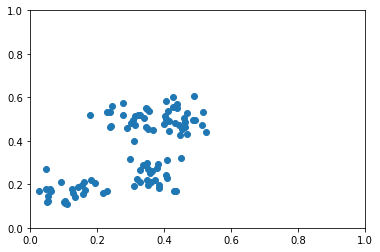

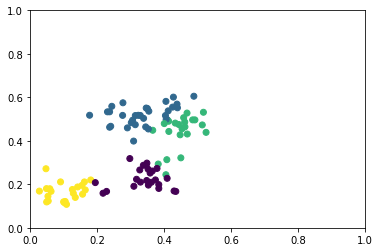

4


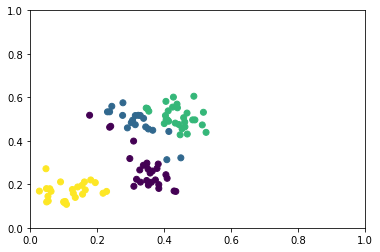

4


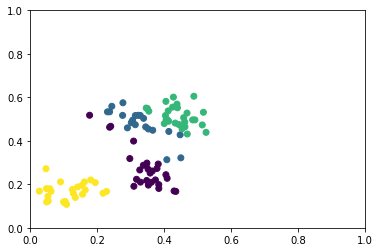

4


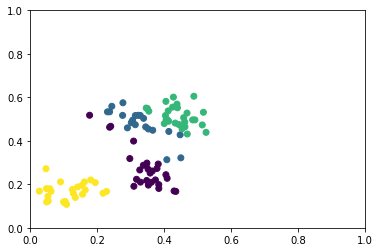

4


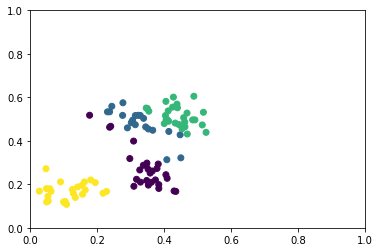

4


In [12]:
n = 100      # number of data points
k = 4        # Number of centers
std = 2      # std of datapoints

points,o_centers = get_data(n,k,std)       #dataset

points = preprocess(points)                # Normalize dataset
plt.figure()                                  
draw_plot(points,o_centers,label=False)

centroids = initialize_centers(points,k)   # Intialize centroids


# run k-means algorithm
for i in range(5):
    
    centers = find_nearest_neighbour(points,centroids)       # find nearest centers
    plt.figure()
    draw_plot(points,centers)
    #plot_centroids(centroids)
    centroids = find_centroids(points,centers)               # find centroids